# Tensor

A tensor is block of numbers in some dimension. For example, 0 dimension tensor is a single number.

In [1]:
import torch

t=torch.tensor(42)
print(t.shape)
print(t)

torch.Size([])
tensor(42)


In [2]:
t=torch.tensor([[1.0,-1.0]])
print(t.shape)
print(t)

torch.Size([1, 2])
tensor([[ 1., -1.]])


In [3]:
t=torch.tensor([[1.0],[2.0]])
t.shape

torch.Size([2, 1])

## Shape

How many dimensions the tensor has, and how large each of those dimensions is.

In [4]:
t.data.shape

torch.Size([2, 1])

In [5]:
t=torch.tensor([[1.0,-1.0], [2.9, -3.1]])
print(t.shape)
print(t)

torch.Size([2, 2])
tensor([[ 1.0000, -1.0000],
        [ 2.9000, -3.1000]])


## A 1-dimension tensor(a vector)

In [6]:
t=torch.tensor([1,2,3,4,5])
print(t.shape)
print(t)

torch.Size([5])
tensor([1, 2, 3, 4, 5])


## A 2-dimension tensor(a matrix)

In [7]:
t=torch.tensor([[1.0, -1.0], [2.9, -3.1]])
print(t.shape)
print(t)

torch.Size([2, 2])
tensor([[ 1.0000, -1.0000],
        [ 2.9000, -3.1000]])


# A 3-dimensional tensor

In [8]:
t = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(t.shape)
print(t)

torch.Size([2, 2, 2])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


# Neural Networks

In [9]:
import torch
import torch.nn as nn


class SmallGPT(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SmallGPT, self).__init__()
        self.fc1=nn.Linear(input_size, hidden_size)
        self.fc2=nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        """
        forward pass
        how data flows through the model to achieve some output
        """
        x=self.fc1(x) # linear layers are also often called fully connected layers
        x=self.fc2(x) # second linear
        return x

m=SmallGPT(3,4,2)

In [10]:
data_input=torch.tensor([1,2,3], dtype=torch.float32)
output=m(data_input)
print(output)

tensor([-0.3181,  0.7999], grad_fn=<ViewBackward0>)


Here, the input tensor of length is 3 and the output tensor of length is 2. We get a random output.

# Core concept of a neural netowork

Under the hood a neural network can be conceptualized as spots where data gets stored, and weights which the model uses to process the input and turn it into some output.

# Non-linearity

Many problems in the real world can't be modeled with simple linear relationships. So, we bake non-linearity into the model using "activation function", like "Sigmoid".

# torchvision

A PyTorch companion library called "torchvision", which has some utilities for visual modeling stuff.

In [11]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:09<00:00, 993638.49it/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 149629.49it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1228205.74it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2373601.89it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [12]:
# First tensor represents all of the images in the training set
print(train_data.data.shape)

# The second tensor represents all of the corresponding labels
print(train_data.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


tensor(1)


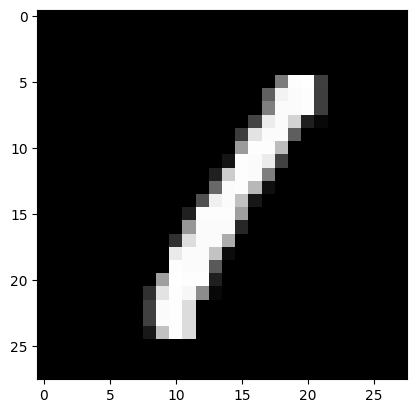

In [13]:
# Visualization

import matplotlib.pyplot as plt

i=3
print(train_data.targets[i])

plt.imshow(train_data.data[i], cmap='gray')
plt.show()

## Check tensor of image

Here, we let PyTorch can print out in super long lines, then printing the actual values in the tensor that represents an image.

In [14]:
# We will use all the data to train our model

import torch

torch.set_printoptions(linewidth=200)
print(train_data.data[i])
print(train_data.data[i].shape)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 2

# Building the model



In [15]:
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        # 28*28=784
        self.fc1=nn.Linear(784, 128)
        self.activation1=nn.ReLU()
        self.fc2=nn.Linear(128,64)
        self.activation2=nn.ReLU()
        # the output is 10, meaning the model will output 10 numbers. 
        # It represent the models condidence for every number (0-9).
        self.fc3=nn.Linear(64, 10)
    
    def forward(self, x):
        """
        Use flatten(x) function flattent the images from a 2D representationinto a 1D representation
        """
        
        x=torch.flatten(x) # it's not a 28*28 matrix, it is a vector of length 28*28 which is 784.
        x=self.fc1(x)
        x=self.activation1(x)
        x=self.fc2(x)
        x=self.activation2(x)
        x=self.fc3(x)
        return x

# Training

In [16]:
import torch.nn.functional as F
import torch.optim as optim

model=MNISTModel()
loss_fn=nn.CrossEntropyLoss() # it's used to calcualte how wrong a particular prediction is
# SGD: stochastic gradient descent
# model can get updated based on how wrong it was(the loss)
# lr: how much the model's parameters will be changed based on every training example
optimizer=torch.optim.SGD(model.parameters(), lr=1e-4)

losses=[] # keep track the loss ar each training example

for (x,y) in zip(train_data.data, train_data.targets): # get data and label
    
    x=x.type(torch.float32) # data type for the numbers have to be the same for PyTorch to do math between two numbers
    
    # asking the model to make a prediction
    y_pred=model.forward(x)
    
    # re-formatting the otuput to instead of 0-10 it's [1,0,0,0,0,0,0,0,0,0] - [0,0,0,0,0,0,0,0,0,1]
    # we need the desired output represented as a list of 10 probabilities
    y=F.one_hot(y, 10).type(torch.float32)
    
    loss=loss_fn(y_pred, y)
    
    # Backward pass (updating model absed on gradients)
    optimizer.zero_grad() # reset the model, make it ready to learn based on a new example
    loss.backward() # what parameters need to be bigger or smaller
    optimizer.step() # We know which parameters need to be bigger or smaller to have better output, and use the optimizer to make the changes
    
    # keeping track of loss
    losses.append(float(loss))

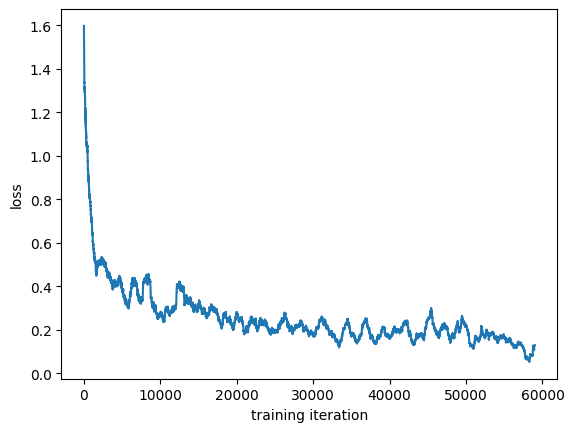

In [17]:
import matplotlib.pyplot as plt
import numpy as np

#if we just plot the loss of individual samples we'll get a very sporadic line.
#This smooths out the trend of our data.
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

#Plotting a smoothed version of loss over successive training examples.
plt.plot(moving_avg(losses, 1000))
plt.xlabel('training iteration')
plt.ylabel('loss')
plt.show()

# Testing

In [18]:
num_true = 0
test_quant = 0

for (x_test, y_test) in zip(test_data.data, test_data.targets):
    #running test example through model
    y_pred_test = model(x_test.type(torch.float32))

    #getting predicted value (highest value)
    y_pred_test = torch.argmax(y_pred_test)

    #checking to see if the right value was predicted
    if bool(y_pred_test == y_test):
        num_true += 1
    test_quant += 1

print(f'Accuracy %:')
print((num_true/test_quant)*100)

Accuracy %:
94.03


# Acknowledgements

* https://towardsdatascience.com/ai-for-the-absolute-novice-intuitively-and-exhaustively-explained-7b353a31e6d7